**数据探索**

对数据进行探索并进行可视化操作

In [2]:
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  
import seaborn as sns  
csvFile='./data'+os.sep+'data01.csv'
data = pd.read_csv(csvFile,encoding='utf-8')
# print(data) #全部输出
print("\n输出数据前5条")
print(data.head()) #只输出前五条


输出数据前5条
               name   LS         photo                                    RA  \
0     吉林省昌农实业集团有限公司  张笑恺  4.318588e+10  长春市经济技术开发区金川街与浦东路交汇绿城米兰公馆B栋层304、305室   
1   吉林省华咨工程技术集团有限公司   刘尚  1.739008e+10              经济开发区洋浦大街4629号佳泰云大厦1102室   
2     吉林省英辰科技股份有限公司   吴琼  1.850068e+10         吉林省长春市高新开发区超群街191号孵化大厦1号楼6层东侧   
3     吉林省寰旗科技股份有限公司  刘田影  4.318259e+10                      吉林省长春市朝阳区建政路815号   
4  长春融成智能设备制造股份有限公司  霍箭东  4.318702e+10                 吉林省长春市北湖科技开发区中盛路3088号   

                                                  BS      RC          CT  \
0  一般项目：中草药种植；中草药收购；谷物种植；食用菌种植；豆类种植；油料种植；薯类种植；花卉种...  4000.0   2001/4/27   
1  工程咨询，工程设计，规划咨询，工程监理，工程造价，工程勘察与测量，地产评估，招投标代理，合同...  2000.0   2015/1/30   
2  一般项目：软件开发；软件销售；电子产品销售；机械设备研发；计算机软硬件及辅助设备零售；橡胶制...  2200.0   2008/1/28   
3  一般项目：信息系统集成服务；广告设计、代理；广告制作；平面设计；卫星技术综合应用系统集成；卫...  2000.0    2010/4/8   
4  一般项目：通用设备制造（不含特种设备制造）；通用设备修理；专用设备制造（不含许可类专业设备制...  5230.0  1996/10/21   

         DAC    NOI   AROIN                   TOE   F

**查看数据的大致情况**


In [3]:
explore = data.describe(percentiles=[],include='all').T
# 测试
print('\n数据描述统计结果： ')
print(explore)
explore['null'] = len(data) - explore['count']
explore = explore[['null','max','min']]
explore.columns = ['空值数','最大值','最小值']
# 测试
print('\n最终探索的数据结果为：')
print(explore)
csvPath = os.getcwd() + os.sep + 'out' #返回根目录
# 判断是否存在，若不则创建
if not os.path.exists(csvPath):
    print('\n>>>程序检测到指定输出文件夹不存在，正在创建中......')
    os.makedirs(csvPath)
    print('\n>>>输出文件夹创建成功.')

# 指定地址并调用函数写入
csvFile = csvPath + os.sep + 'data_explore.csv'
# 写入
explore.to_csv(csvFile,encoding='utf_8_sig',index = False)
print('\n数据写入成功')


数据描述统计结果： 
        count unique                                                top  freq  \
name     2655   2655                                      吉林省昌农实业集团有限公司     1   
LS       2655   2407                                                 田野     6   
photo  2623.0    NaN                                                NaN   NaN   
RA       2655   2627  长春市净月开发区生态东街3330号吉林青年创业园（吉林省青年电商双创基地、吉林省青年新媒体创...     3   
BS       2655   2640  一般项目：软件开发；技术服务、技术开发、技术咨询、技术交流、技术转让、技术推广；物联网技术研...     3   
RC     2653.0    NaN                                                NaN   NaN   
CT       2655   1774                                           2021/1/8    10   
DAC      2613     16                                      长春净月高新技术产业开发区   754   
NOI    2612.0    NaN                                                NaN   NaN   
AROIN  2612.0    NaN                                                NaN   NaN   
TOE      2655     22                                   有限责任公司（自然人投资或控股）  1638   
FS     2653.0   

**做出一些常见的统计**

统计每个地区有多少个公司

每个地区的公司类型有哪些

每个地区的公司规模是什么情况（公司规模中： 0-微型 1-小型 2-中型 3-大型）

公司规模和公司类型的关系

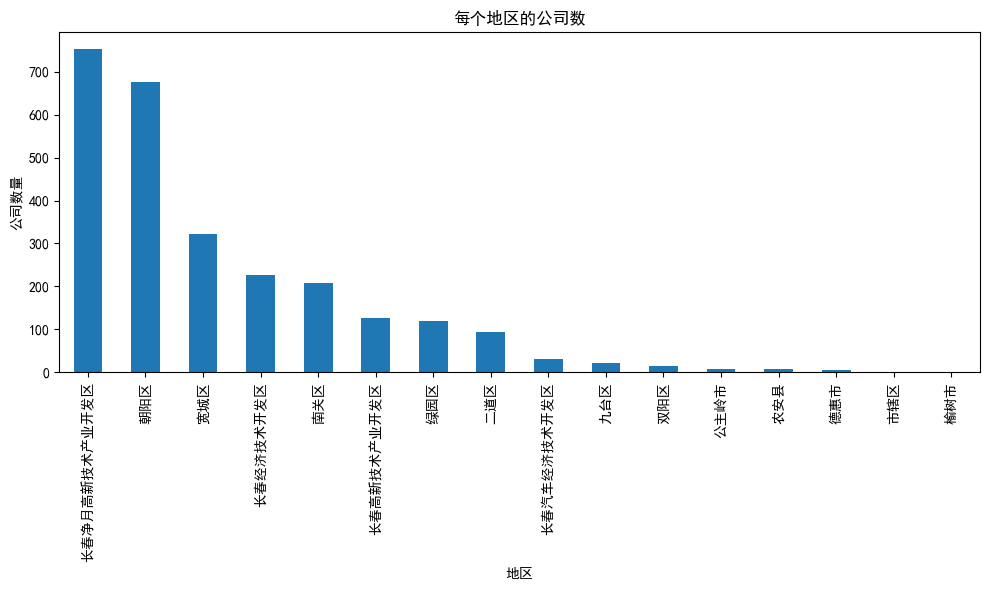

In [4]:
# 统计每个地区有多少个公司
data00=data[['DAC','FS']]

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体  
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号


# 统计每个地区的公司数量  
company_counts_by_region = data00['DAC'].value_counts()  

# 可视化每个地区的公司数量（条形图）  
plt.figure(figsize=(10, 6))  
company_counts_by_region.plot(kind='bar')  
plt.title('每个地区的公司数') 
plt.xlabel('地区')  
plt.ylabel('公司数量')  
plt.tight_layout()  

csvPath = os.getcwd() + os.sep + 'image' #返回根目录
# 判断是否存在，若不则创建
if not os.path.exists(csvPath):
    print('\n>>>程序检测到指定输出文件夹不存在，正在创建中......')
    os.makedirs(csvPath)
    print('\n>>>输出文件夹创建成功.')
plt.savefig('image/company_counts_by_region.png')  # 保存为PNG图片  
plt.show()  

从图表中可以看到 长春的公司主要集中到“长春净月高新技术产业开发区” ，其次在“朝阳区”，两者求和将近一半之多，产生这样现象的原因可能和当地的政策和环境有关。

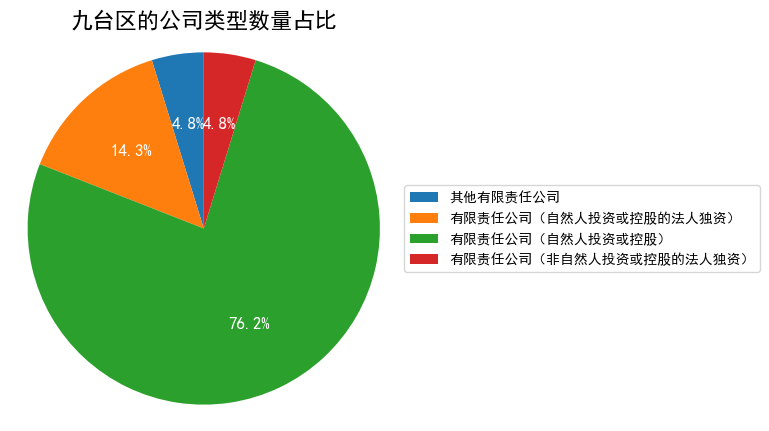

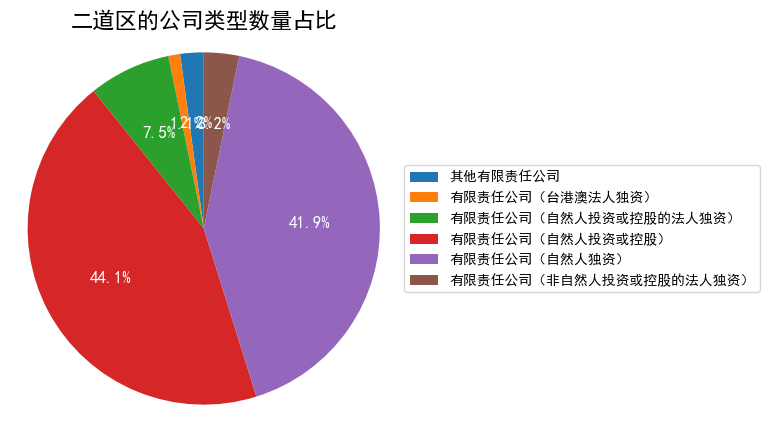

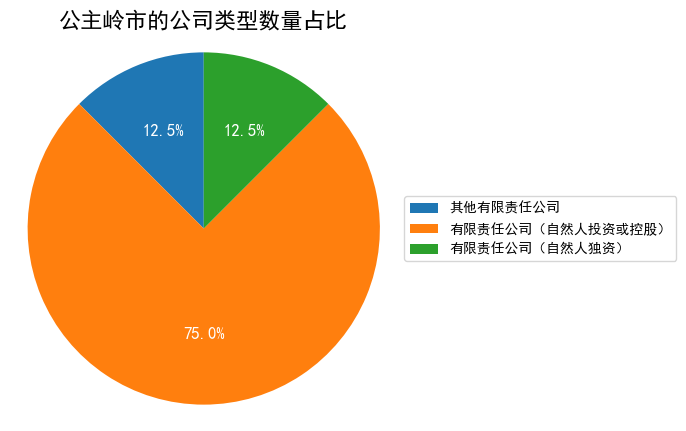

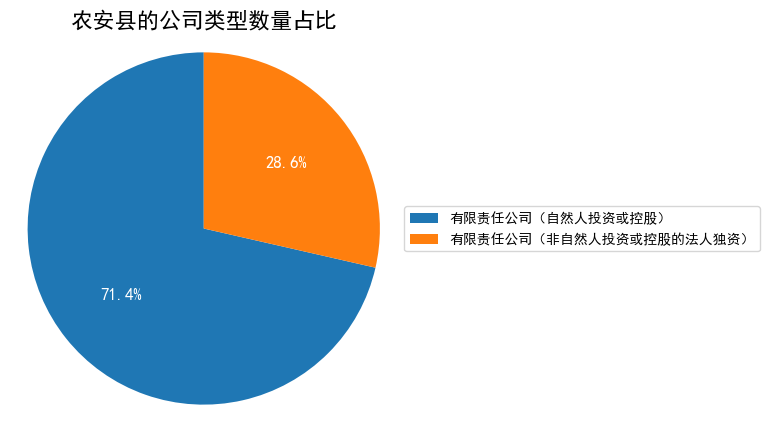

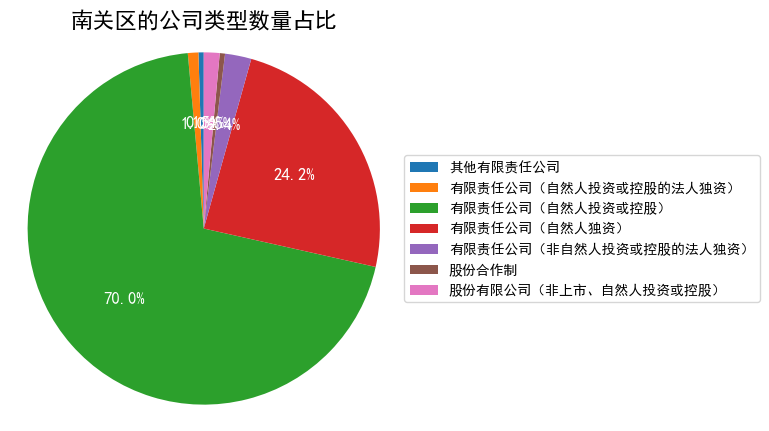

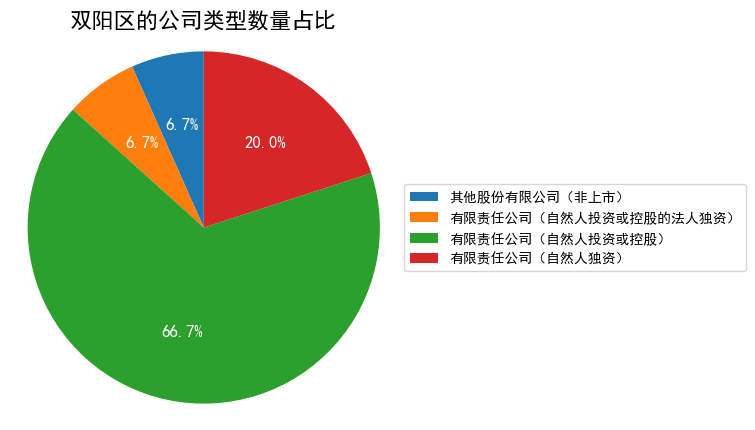

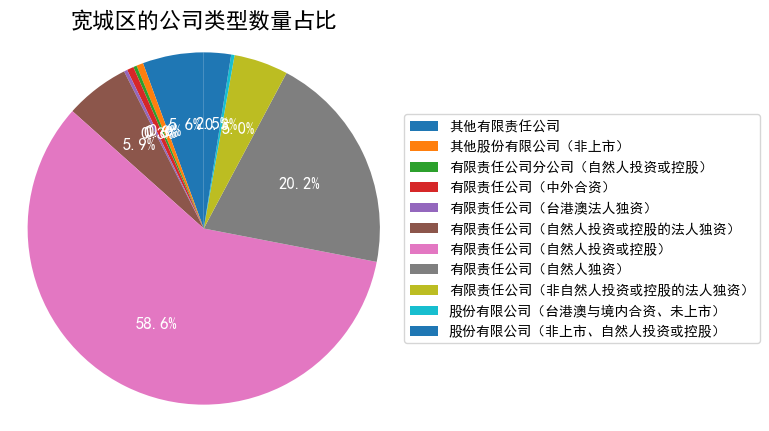

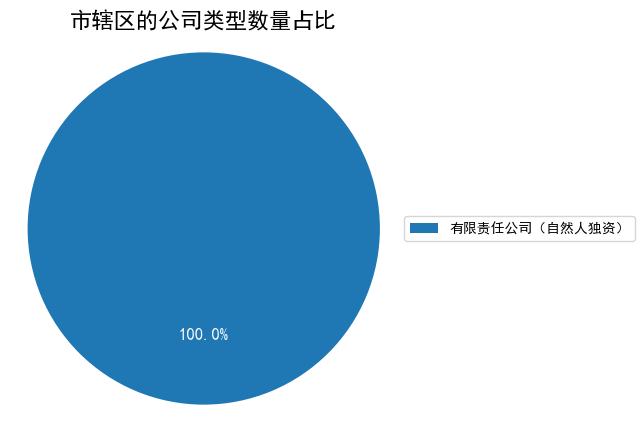

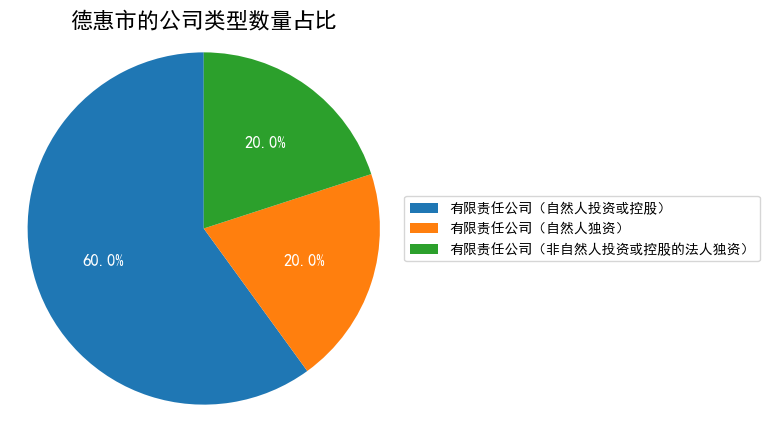

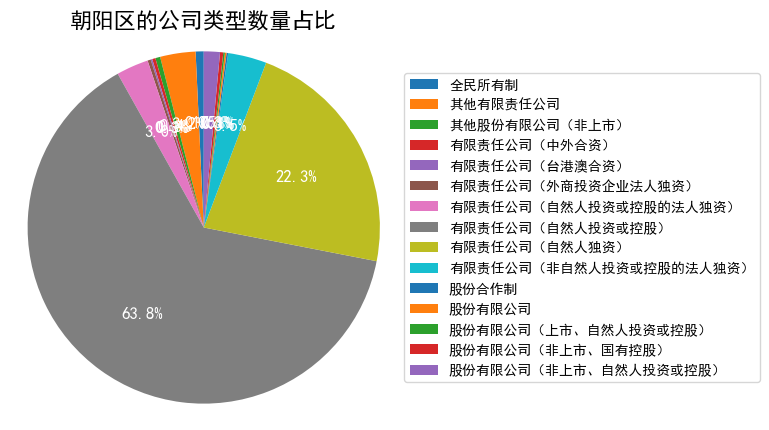

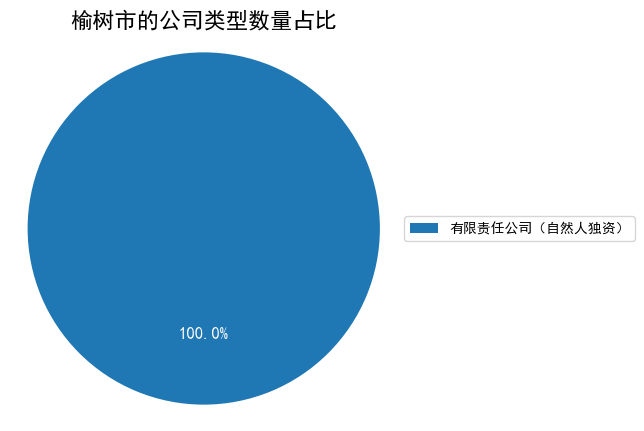

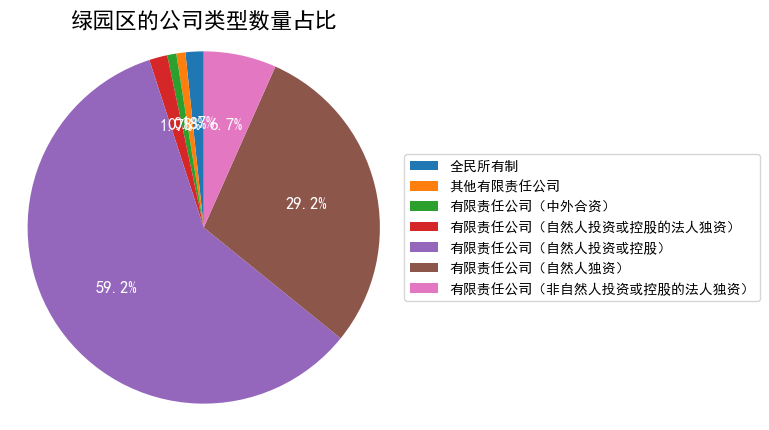

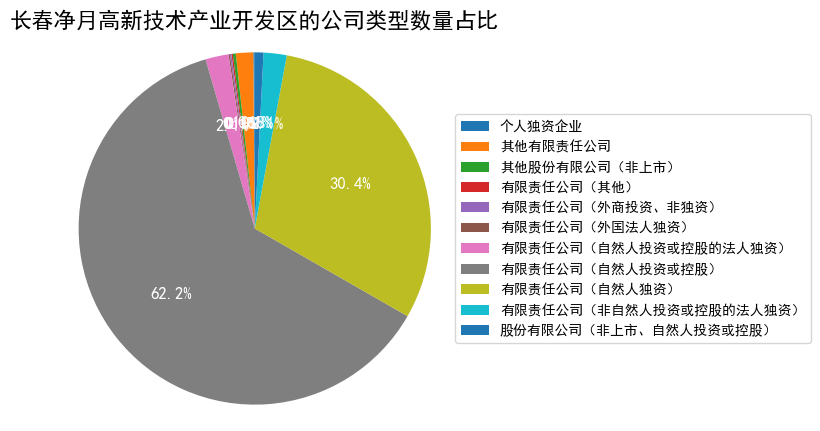

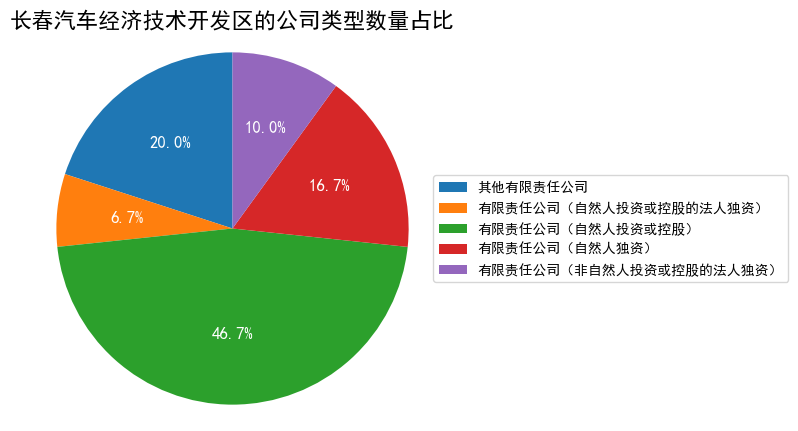

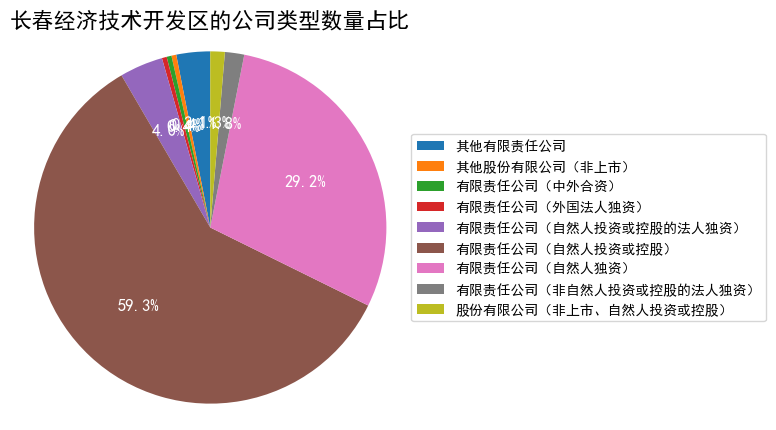

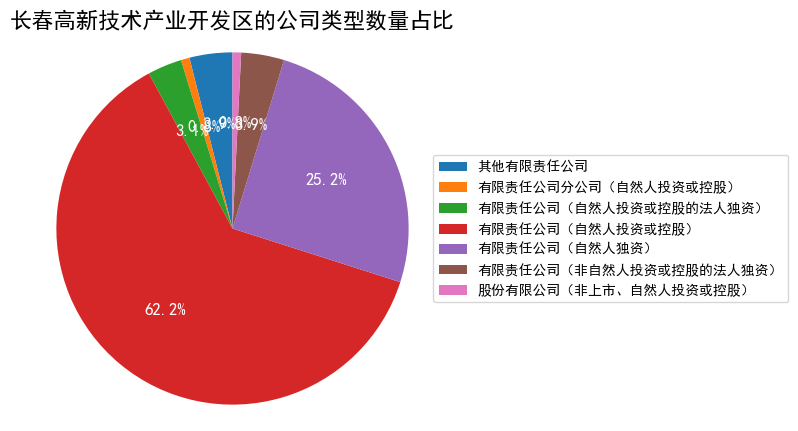

In [15]:
# 每个地区的公司类型有哪些
data01 = data[['DAC', 'TOE']]

# 统计每个地区的公司类型数量
company_counts_by_region = data01.groupby(['DAC', 'TOE']).size().reset_index(name='数量')

# 计算每个地区的总公司数量
total_counts_by_region = company_counts_by_region.groupby('DAC')['数量'].sum().reset_index()

# 对于每个地区，可视化公司类型数量占比（饼图）
for index, row in total_counts_by_region.iterrows():
    region = row['DAC']
    region_counts = company_counts_by_region[company_counts_by_region['DAC'] == region]
    labels = region_counts['TOE']
    sizes = region_counts['数量'] / row['数量']  # 计算每种公司类型数量占总数量的比例
    fig1, ax1 = plt.subplots(figsize=(5, 5))  # 调整图形大小
    wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))  # 设置文本颜色为白色
    ax1.axis('equal')
    plt.title(f'{region}的公司类型数量占比', fontsize=16)  # 调整标题大小
    plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))  # 将标签放在饼图外部
    plt.setp(autotexts, size=12)  # 调整自动标签大小
    plt.savefig(f'image/{region}_company_types_percentage.png', bbox_inches='tight')  # 使用bbox_inches='tight'来自动调整图形边界
    plt.show()

每个地区公司种类多样，公司数量越多，种类越是丰富，而且几乎所有地区的公司都以“有限责任公司（自然人投资或控股）”为主，产生这种原因可能和公司制度有关系。

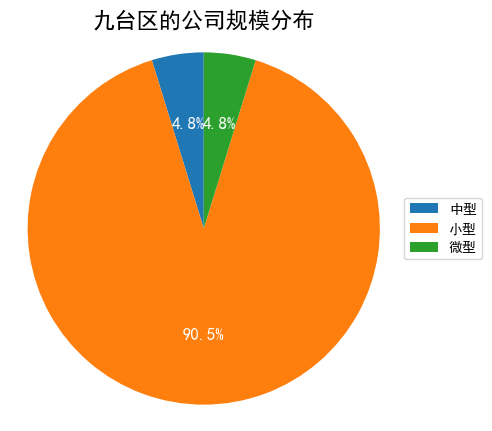

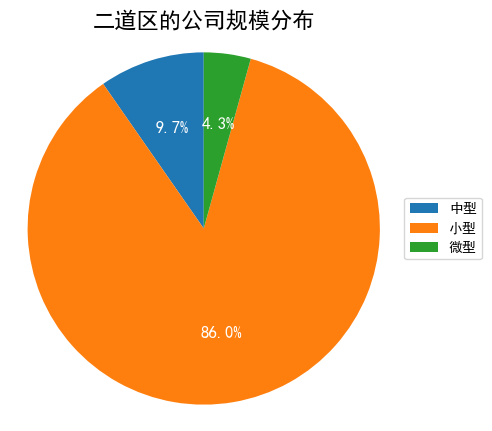

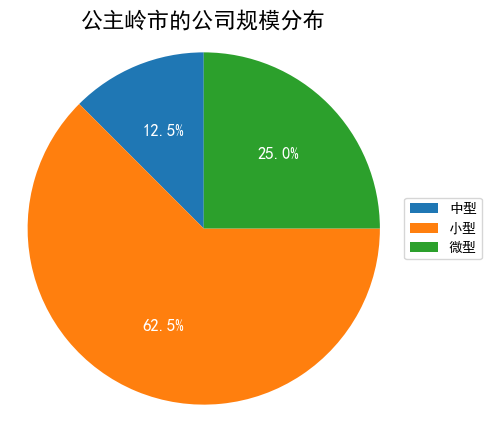

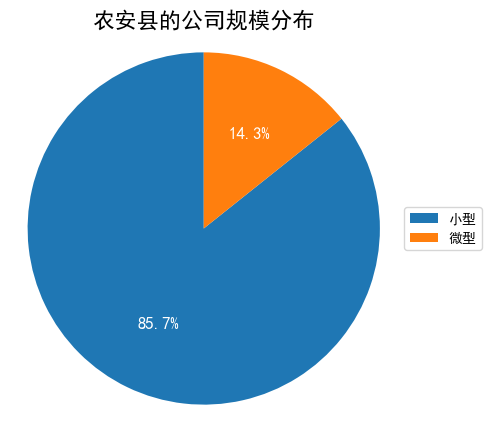

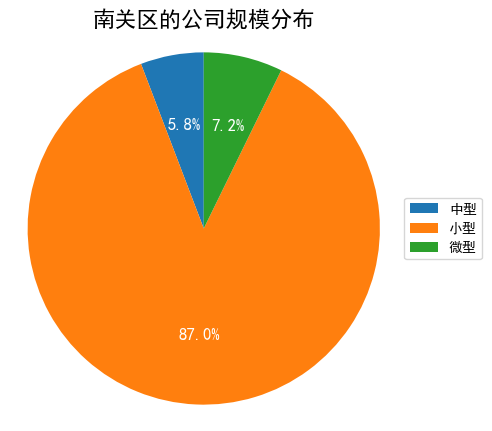

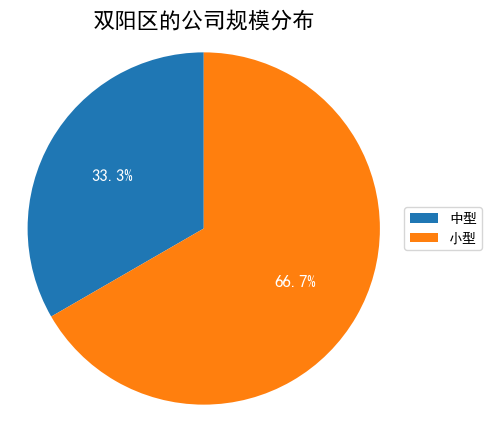

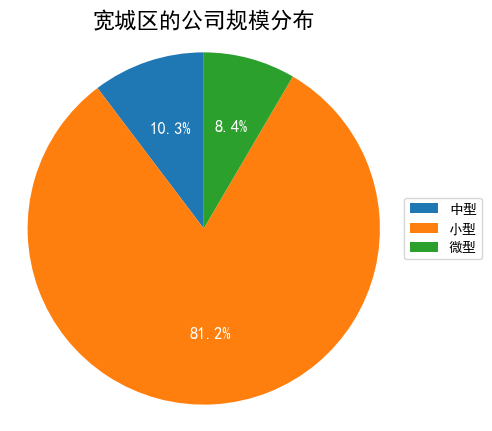

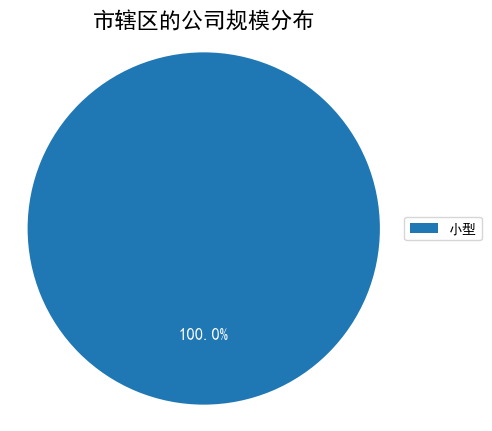

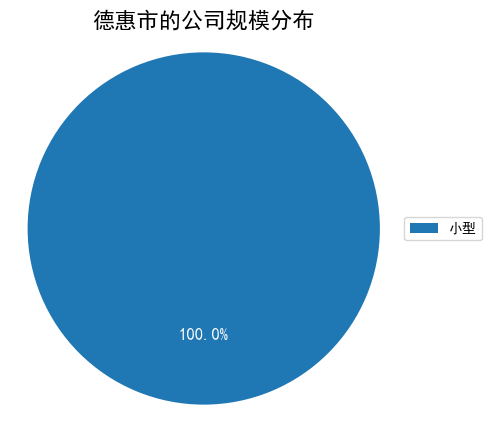

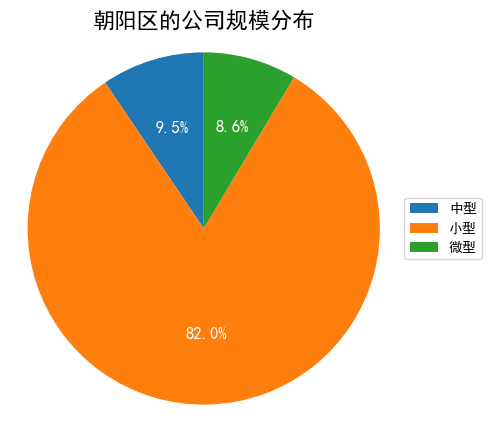

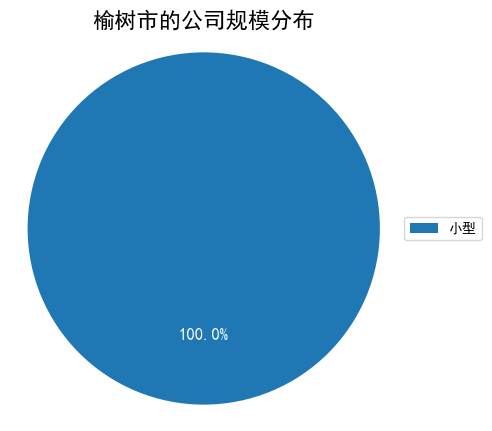

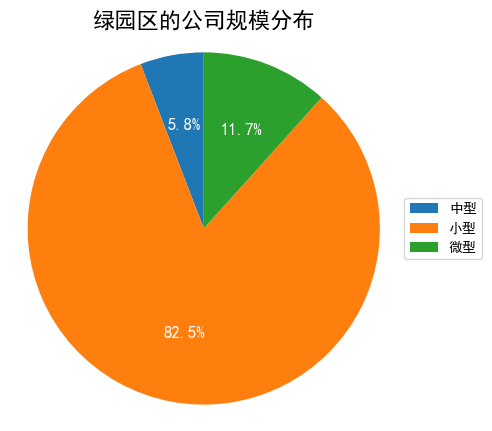

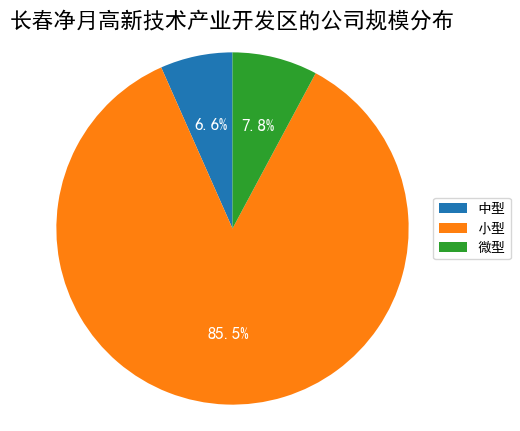

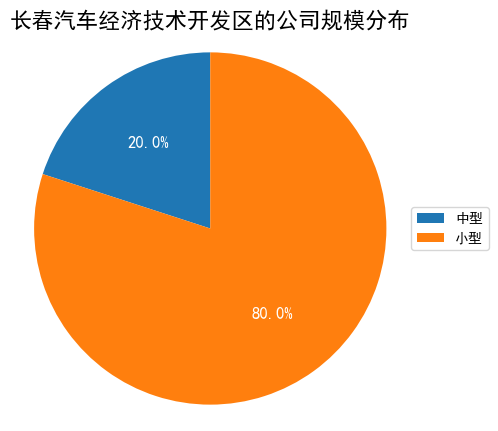

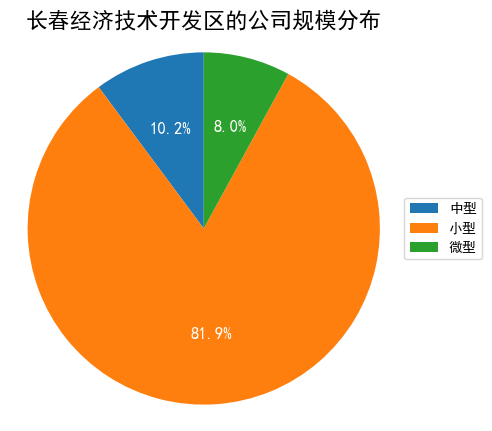

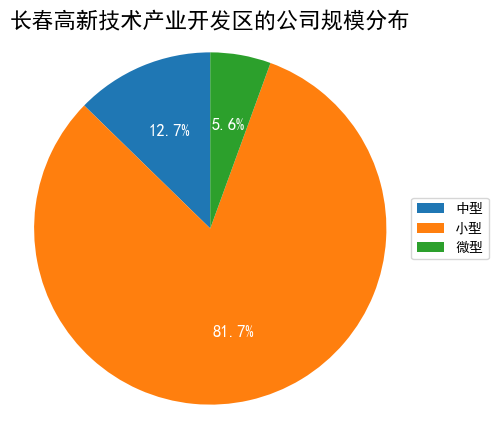

In [17]:
# 每个地区的公司规模是什么情况
data02 = data[['DAC', 'FS']].copy()

# 将标签值修改为相应的规模名称
data02['FS'] = data02['FS'].replace({0.0: '微型', 1.0: '小型', 2.0: '中型'})

# 统计每个地区的公司规模
company_size_by_region = data02.groupby(['DAC', 'FS']).size().reset_index(name='数量')

# 计算每个地区的总公司数量
total_counts_by_region = company_size_by_region.groupby('DAC')['数量'].sum().reset_index()

# 对于每个地区，可视化公司规模分布（饼图）
for index, row in total_counts_by_region.iterrows():
    region = row['DAC']
    region_size = company_size_by_region[company_size_by_region['DAC'] == region]
    labels = region_size['FS']
    sizes = region_size['数量'] / row['数量']  # 计算每种公司规模数量占总数量的比例
    fig1, ax1 = plt.subplots(figsize=(5, 5))  # 调整图形大小
    wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))  # 设置文本颜色为白色
    ax1.axis('equal')
    plt.title(f'{region}的公司规模分布', fontsize=16)  # 调整标题大小
    plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))  # 将标签放在饼图外部
    plt.setp(autotexts, size=12)  # 调整自动标签大小
    plt.savefig(f'image/{region}_company_size_distribution.png', bbox_inches='tight')  # 使用bbox_inches='tight'来自动调整图形边界
    plt.show()

每个地区大都有中小型企业，各地区大都是以小型企业为主，小型企业占比最多。产生这种情况的原因可能和当地的环境、经济、政策等有关系

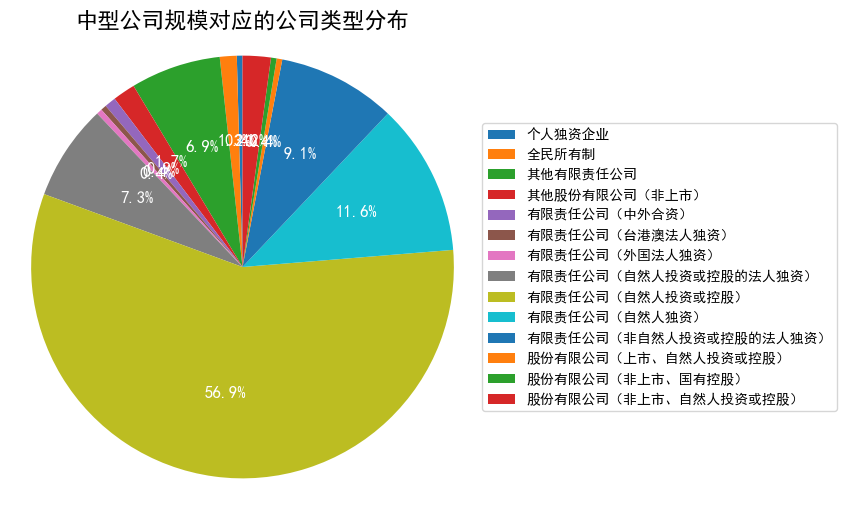

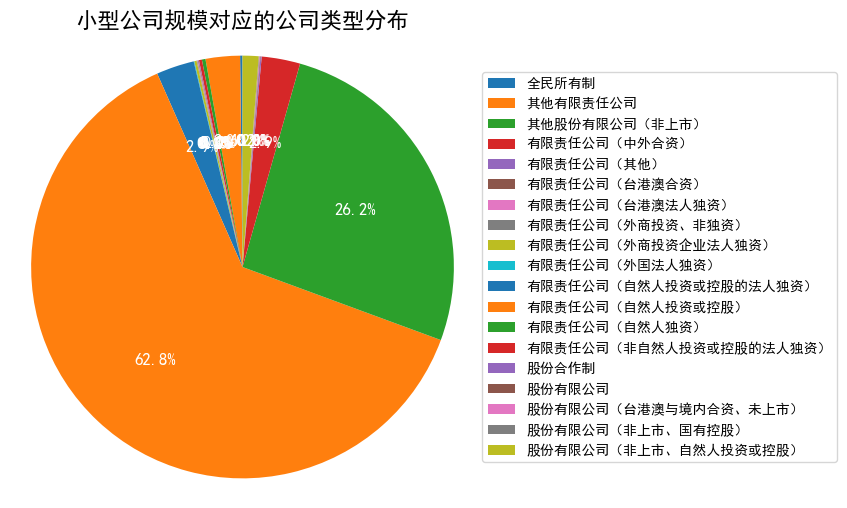

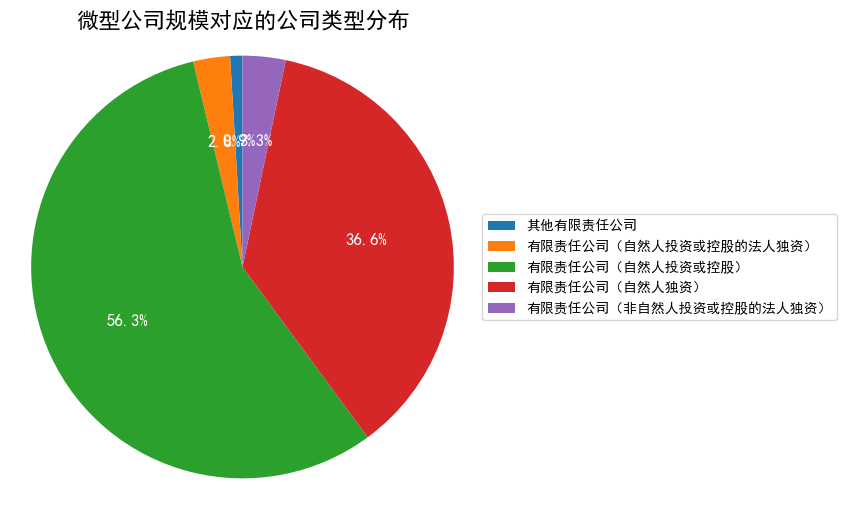

In [22]:
#统计每种公司规模对应公司类型的情况
# 选择公司规模和公司类型两列
data_subset = data[['FS', 'TOE']].copy()

# 将公司规模的标签值修改为相应的规模名称
data_subset.loc[:, 'FS'] = data_subset['FS'].replace({0.0: '微型', 1.0: '小型', 2.0: '中型'})

# 统计每种公司规模对应的公司类型的情况
company_types_by_size = data_subset.groupby(['FS', 'TOE']).size().reset_index(name='数量')

# 对于每种公司规模，可视化其对应的公司类型分布（饼图）
for size in company_types_by_size['FS'].unique():
    subset = company_types_by_size[company_types_by_size['FS'] == size]
    labels = subset['TOE']
    sizes = subset['数量']
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))
    ax1.axis('equal')
    plt.title(f'{size}公司规模对应的公司类型分布', fontsize=16)
    plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=12)
    plt.savefig(f'image/{size}_company_types_distribution.png', bbox_inches='tight')
    plt.show()

无论是那种公司类型，大都以“有限责任公司（自然人投资或控股）”为主

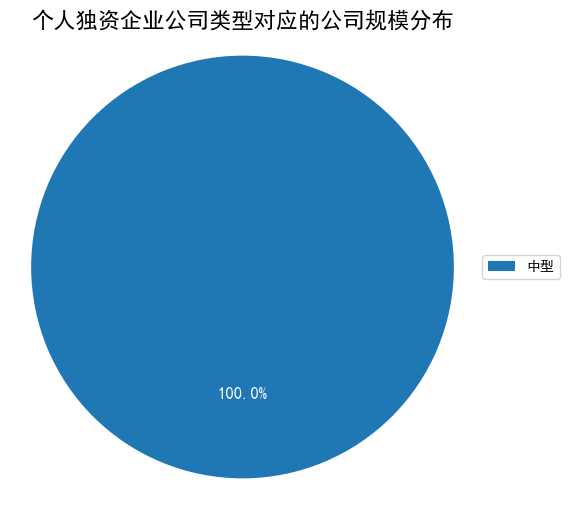

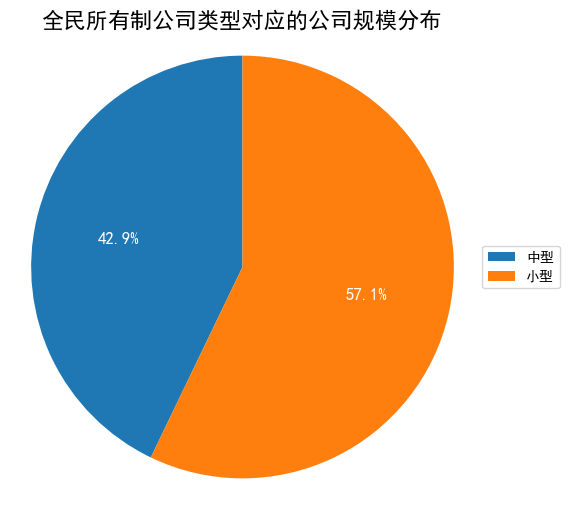

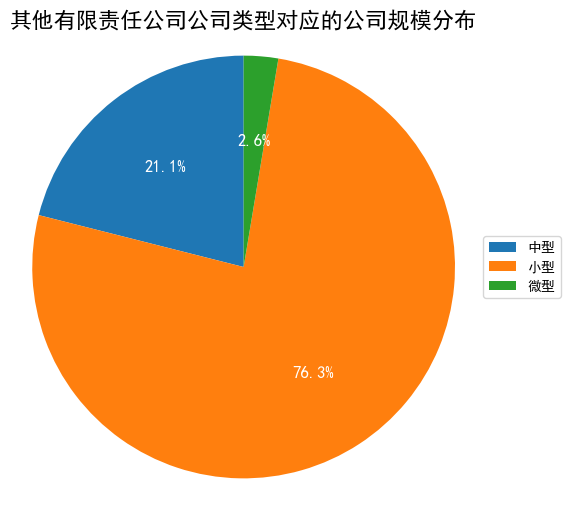

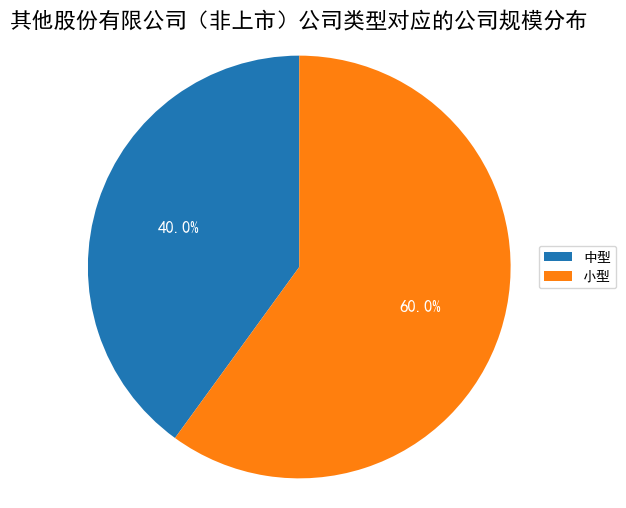

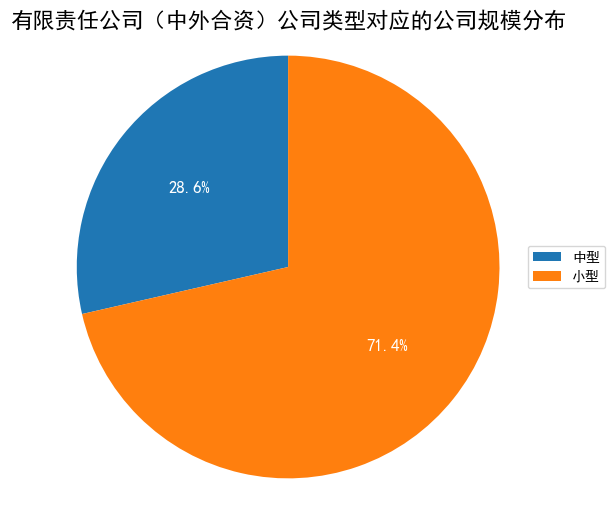

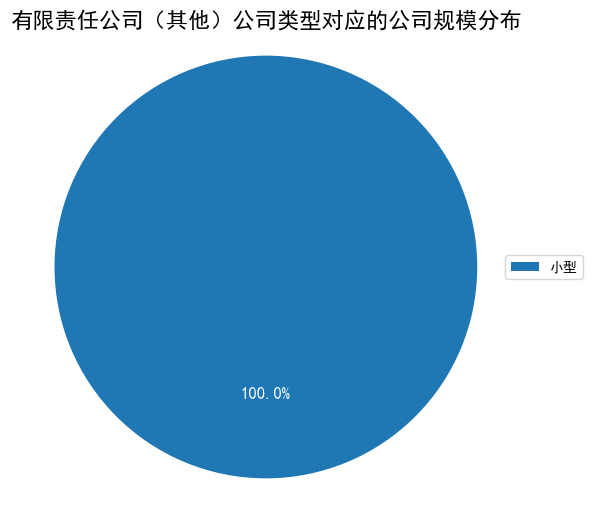

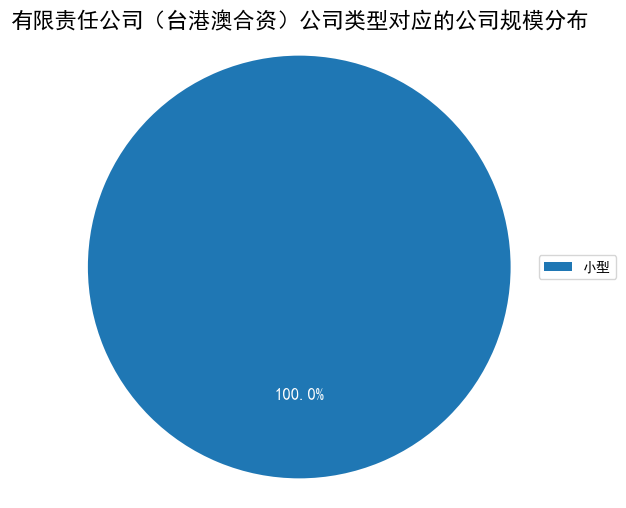

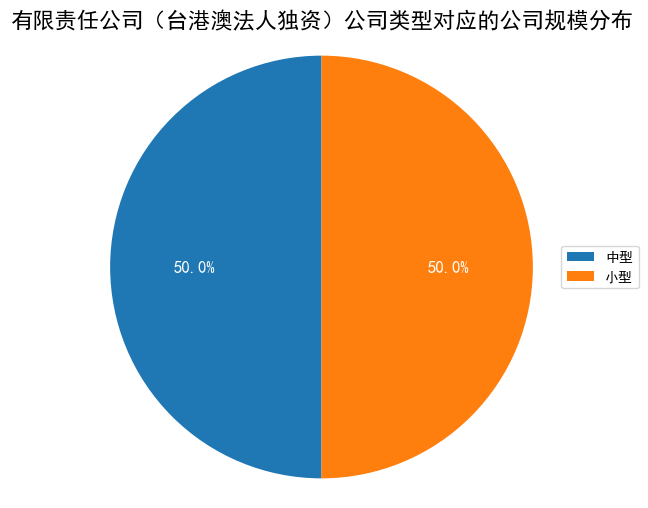

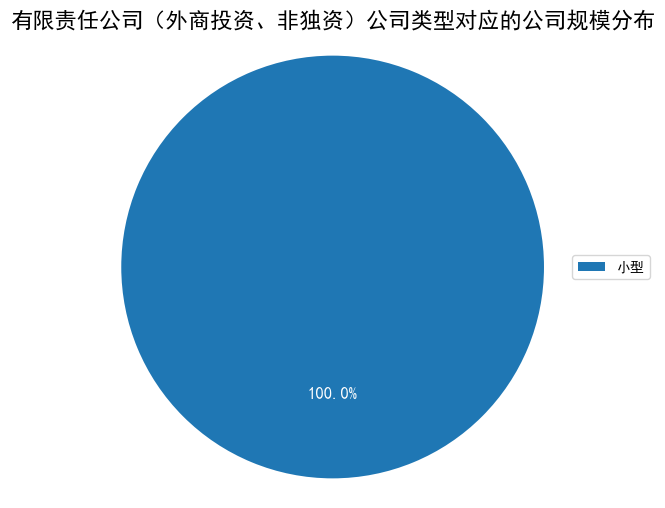

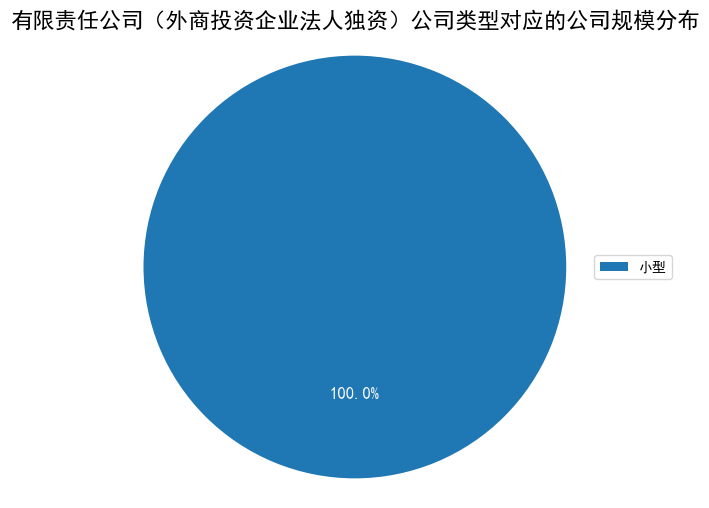

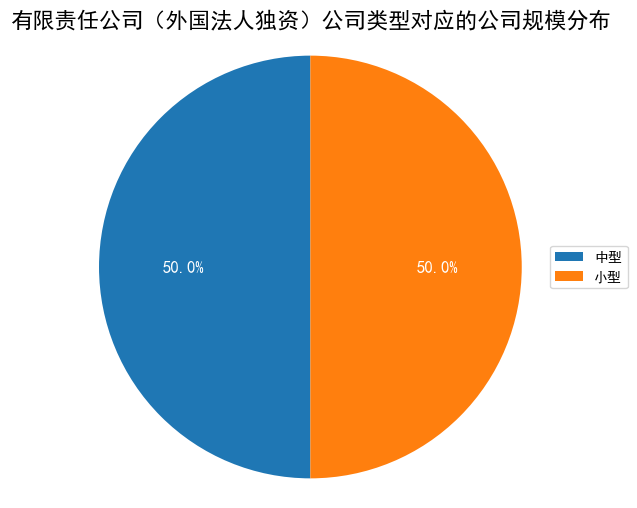

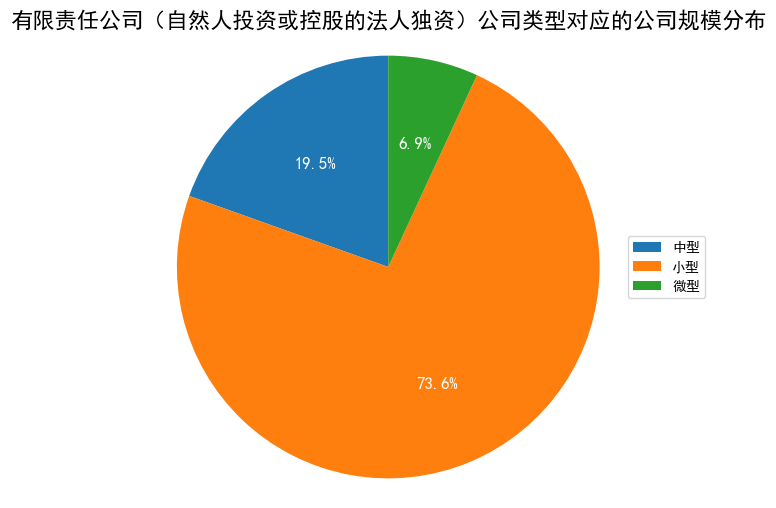

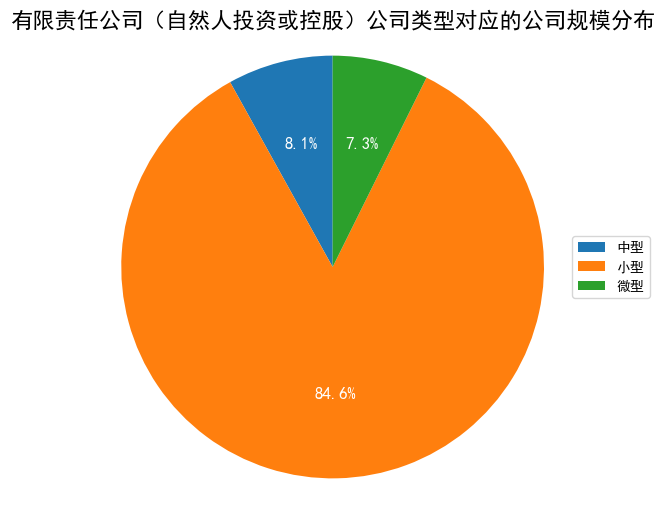

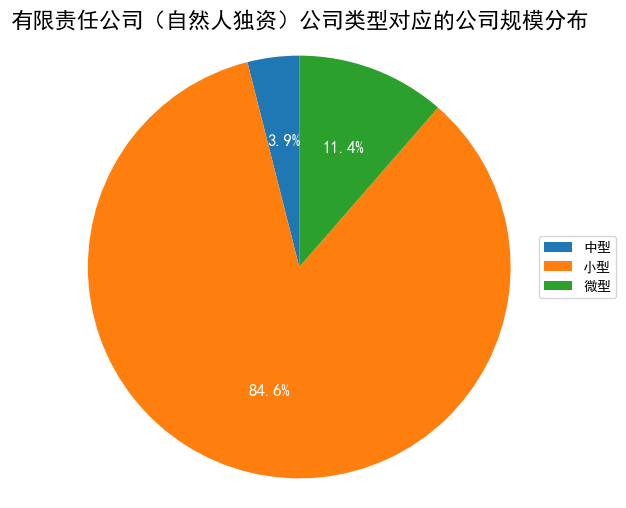

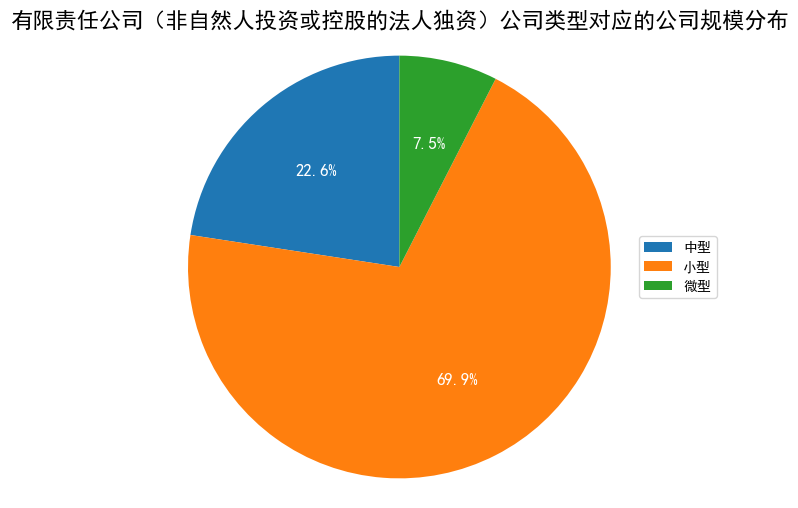

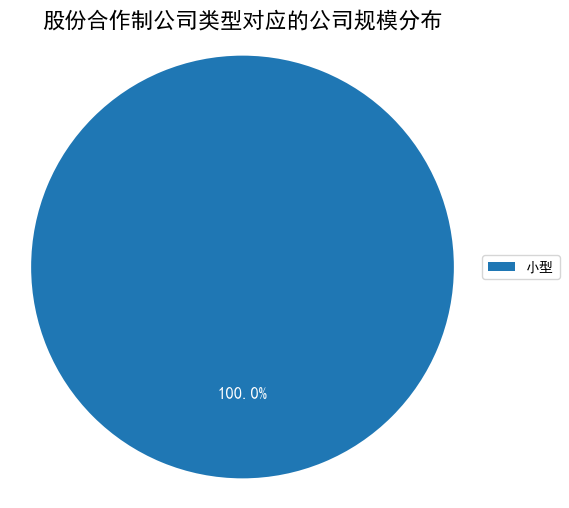

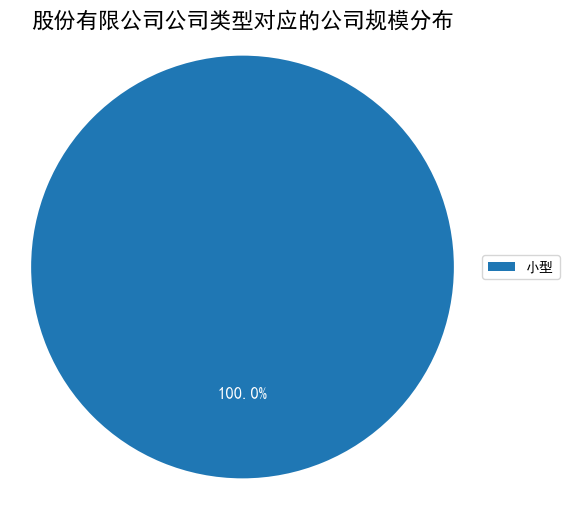

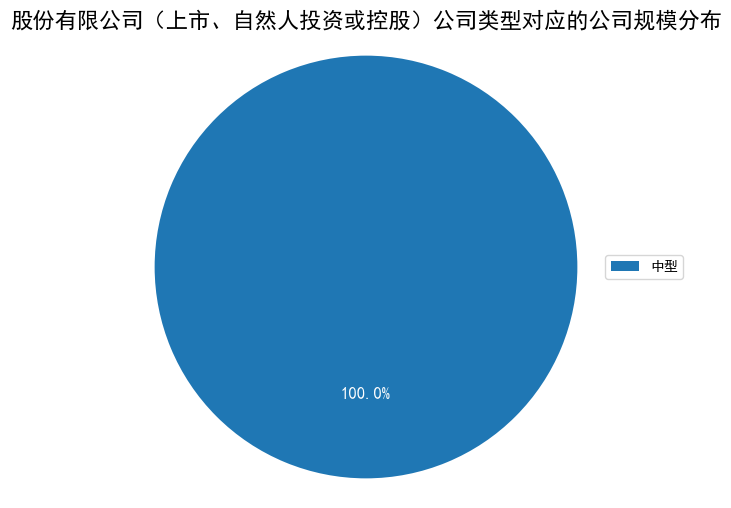

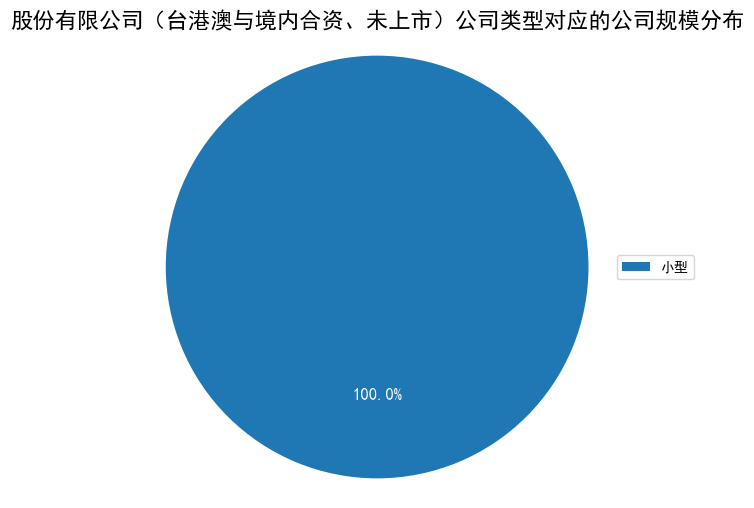

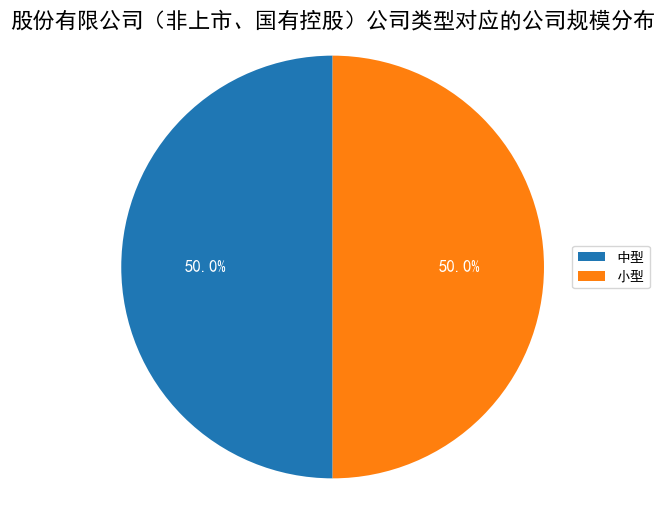

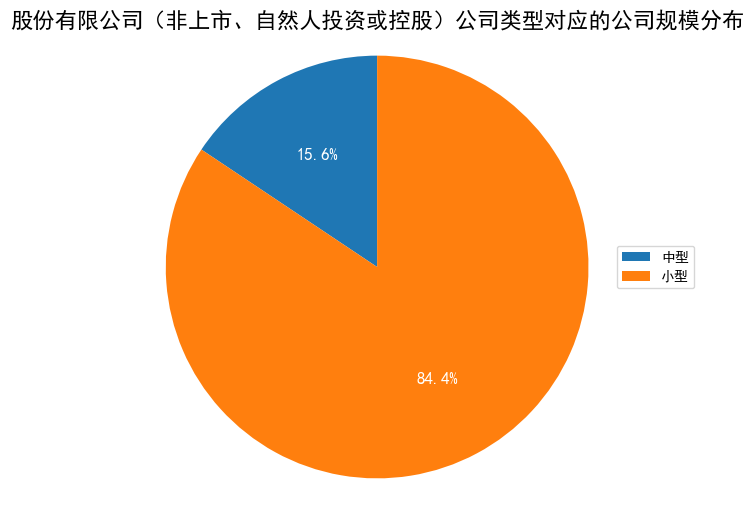

In [25]:
# 选择公司规模和公司类型两列
data_subset = data[['FS', 'TOE']].copy()

# 将公司规模的标签值修改为相应的规模名称
data_subset.loc[:, 'FS'] = data_subset['FS'].replace({0.0: '微型', 1.0: '小型', 2.0: '中型'})

# 统计不同公司类型对应不同公司规模的情况
company_sizes_by_type = data_subset.groupby(['TOE', 'FS']).size().reset_index(name='数量')

# 对于每种公司类型，可视化其对应的公司规模分布（饼图）
for company_type in company_sizes_by_type['TOE'].unique():
    subset = company_sizes_by_type[company_sizes_by_type['TOE'] == company_type]
    labels = subset['FS']
    sizes = subset['数量']
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))
    ax1.axis('equal')
    plt.title(f'{company_type}公司类型对应的公司规模分布', fontsize=16)
    plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=12)
    plt.savefig(f'image/{company_type}_company_size_distribution.png', bbox_inches='tight')
    plt.show()

每种公司类型大都有中小型企业，各种类型大都是以小型企业为主，小型企业占比最多。